In [5]:
import csv
import pandas
import random
import numpy as np
import matplotlib.pyplot as plt

In [16]:
mu, sigma = 1500, 200 # mean and standard deviation
sElo = np.random.normal(mu, sigma, (1000))

mu, sigma = 50, 10 # mean and standard deviation
sDeviation = np.random.normal(mu, sigma, (1000))

with open('players_file.csv', mode='w') as csv_file:
    fieldnames = ['id', 'points', 'deviation']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(sElo.shape[0]):
        elo = random.randint(1300, 2000)
        deviation = random.randint(20, 350)
        writer.writerow({'id': i, 'points': sElo[i], 'deviation': sDeviation[i]})

In [17]:
df = pandas.read_csv('players_file.csv')
print(df)

      id       points  deviation
0      0  1624.870400  56.470162
1      1  1488.704933  39.966530
2      2  1394.552460  69.315797
3      3  1543.303096  57.519531
4      4  1357.953111  67.973285
..   ...          ...        ...
995  995  1692.529492  42.336236
996  996  1800.910953  48.522618
997  997  1801.247660  54.618232
998  998  1249.472453  43.255513
999  999  1260.652591  53.213631

[1000 rows x 3 columns]


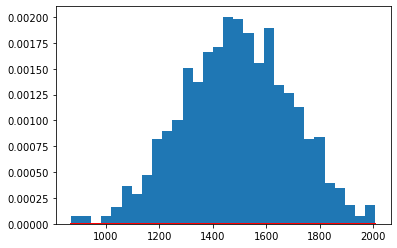

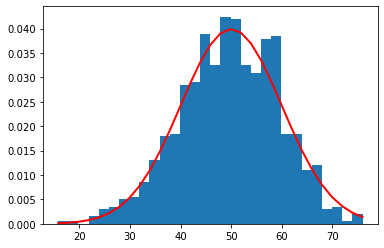

In [54]:
count, bins, ignored = plt.hist(sElo, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

count, bins, ignored = plt.hist(sDeviation, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [1]:
import json

In [7]:
# Function to convert a CSV to JSON
# Takes the file paths as arguments
def make_json(csvFilePath, jsonFilePath):
     
    # create a dictionary
    data = {}
     
    # Open a csv reader called DictReader
    with open(csvFilePath, encoding='utf-8') as csvf:
        csvReader = csv.DictReader(csvf)
         
        # Convert each row into a dictionary 
        # and add it to data
        for rows in csvReader:
             
            # Assuming a column named 'No' to
            # be the primary key
            key = rows['id']
            data[key] = rows
 
    # Open a json writer, and use the json.dumps() 
    # function to dump data
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf:
        jsonf.write(json.dumps(data, indent=4))
         
# Driver Code
 
# Decide the two file paths according to your 
# computer system
csvFilePath = r'players_file.csv'
jsonFilePath = r'Names.json'
 
# Call the make_json function
make_json(csvFilePath, jsonFilePath)